𝐈𝐦𝐩𝐨𝐫𝐭𝐢𝐧𝐠 𝐋𝐢𝐛𝐫𝐚𝐫𝐢𝐞𝐬 𝐧𝐞𝐞𝐝𝐞𝐝

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

𝐏𝐫𝐞𝐩𝐫𝐨𝐜𝐞𝐬𝐬𝐢𝐧𝐠

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\trish\Desktop\ML4PS-master\onlinefoods.csv")

# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

𝐒𝐞𝐥𝐞𝐜𝐭𝐢𝐧𝐠 𝐟𝐞𝐚𝐭𝐮𝐫𝐞𝐬, 𝐭𝐚𝐫𝐠𝐞𝐭, 𝐚𝐧𝐝 𝐬𝐩𝐥𝐢𝐭𝐭𝐢𝐧𝐠 𝐭𝐡𝐞 𝐝𝐚𝐭𝐚 𝐢𝐧𝐭𝐨 𝐓𝐫𝐚𝐢𝐧𝐢𝐧𝐠 𝐚𝐧𝐝 𝐓𝐞𝐬𝐭𝐢𝐧𝐠 𝐬𝐞𝐭𝐬

In [4]:
# Selecting features and target
X = data.drop(columns=['Gender'])  # Removing 'Gender' from features
y = data['Gender']  # Using 'Gender' as the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

𝐃𝐞𝐟𝐢𝐧𝐞 𝐦𝐚𝐱 𝐝𝐞𝐩𝐭𝐡𝐬 𝐚𝐧𝐝 𝐈𝐧𝐢𝐭𝐢𝐚𝐥𝐢𝐳𝐞 𝐥𝐢𝐬𝐭𝐬.

In [5]:
# Define a range of maximum depths to try
max_depths = range(1, 21)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

𝐌𝐨𝐝𝐞𝐥 𝐓𝐫𝐚𝐢𝐧𝐢𝐧𝐠 𝐚𝐧𝐝 𝐄𝐯𝐚𝐥𝐮𝐚𝐭𝐢𝐨𝐧

In [6]:

# Iterate over different maximum depths
for depth in max_depths:
    # Initialize Decision Tree Classifier with current max_depth
    clf = DecisionTreeClassifier(max_depth=depth)
    
    # Training the classifier
    clf.fit(X_train, y_train)
    
    # Predictions on training set
    train_preds = clf.predict(X_train)
    
    # Predictions on test set
    test_preds = clf.predict(X_test)
    
    # Calculate accuracy on training and testing sets
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


𝐑𝐞𝐬𝐮𝐥𝐭

Overall Training Accuracy: 0.9903225806451613
Overall Testing Accuracy: 0.5641025641025641


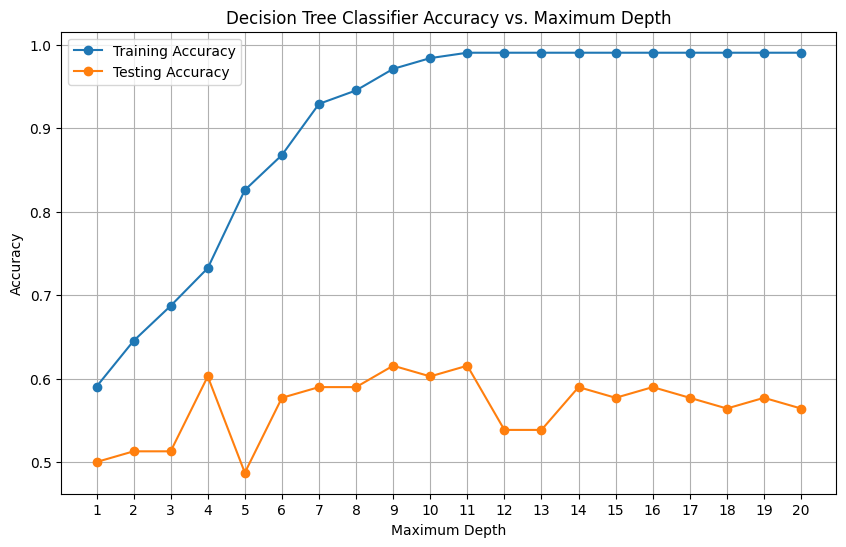

In [7]:

# Print the overall accuracy of training and testing sets
print("Overall Training Accuracy:", train_accuracy)
print("Overall Testing Accuracy:", test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Decision Tree Classifier Accuracy vs. Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()
